### NetID: sh2432

# Minimal neural network implementation

This is a "bare bones" implementation of a 2-layer neural network for classification, using rectified linear units as activation functions. The code is from Andrej Karpathy; please see [this page](http://cs231n.github.io/neural-networks-case-study/) for an annotated description of the code.

Your task in this part of the assigment is to extend this to a 3-layer network, and to experiment with some different settings of the parameters.


## Problem 1 (a): Gradients (5 points)

Calculate the gradients as described in the `assn7.pdf` document.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.facecolor'] = 'lightgray'


(-1.5, 1.5)

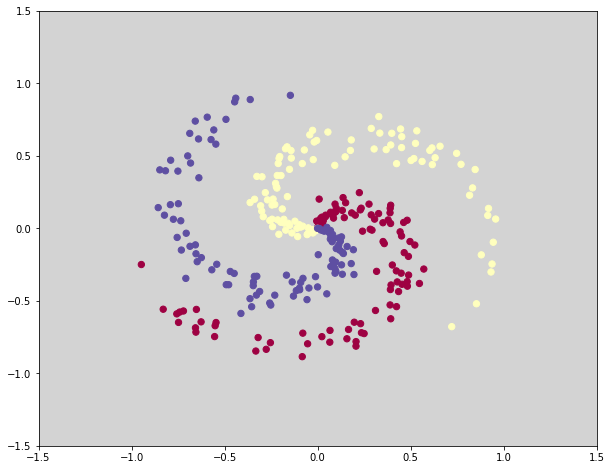

In [5]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])


In [6]:
def train_2_layer_network(H1=100):
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = np.random.randn(H1,K)
    b2 = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(20000):
  
      # evaluate class scores, [N x K]
      hidden_layer = np.maximum(0, np.dot(X, W1) + b1) # note, ReLU activation
      scores = np.dot(hidden_layer, W2) + b2
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: minus log prob
      correct_logprobs = -np.log(probs[range(num_examples),y])
      loss = np.sum(correct_logprobs)/num_examples
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW2 = np.dot(hidden_layer.T, dscores)
      db2 = np.sum(dscores, axis=0, keepdims=True)
      # next backprop into hidden layer
      dhidden = np.dot(dscores, W2.T)
      # backprop the ReLU non-linearity
      dhidden[hidden_layer <= 0] = 0
      # finally into W,b
      dW1 = np.dot(X.T, dhidden)
      db1 = np.sum(dhidden, axis=0, keepdims=True)
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2

    return W1, b1, W2, b2


W1, b1, W2, b2 = train_2_layer_network(100)

iteration 0: loss 5.234923
iteration 1000: loss 0.135617
iteration 2000: loss 0.102535
iteration 3000: loss 0.085465
iteration 4000: loss 0.074823
iteration 5000: loss 0.067282
iteration 6000: loss 0.061611
iteration 7000: loss 0.057220
iteration 8000: loss 0.053762
iteration 9000: loss 0.050898
iteration 10000: loss 0.048406
iteration 11000: loss 0.046287
iteration 12000: loss 0.044470
iteration 13000: loss 0.042857
iteration 14000: loss 0.041421
iteration 15000: loss 0.040143
iteration 16000: loss 0.038996
iteration 17000: loss 0.037952
iteration 18000: loss 0.036997
iteration 19000: loss 0.036121


In [7]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8850693285424291, 1.4149306714575494)

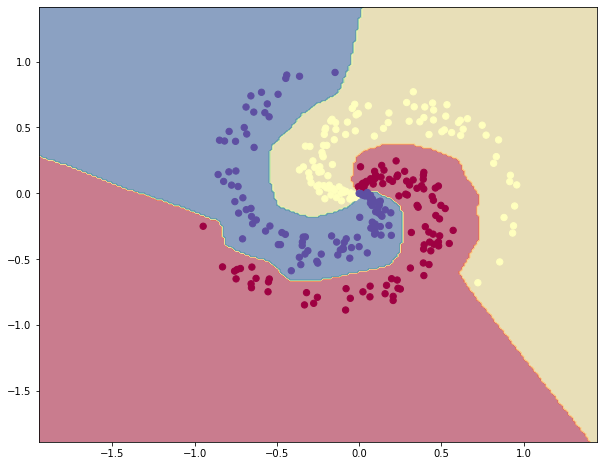

In [8]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


## Problem 1 (b): Extend the code from two layers to three layers (15 points)

Run the code provided in the notebook minimal neural network.ipynb and inspect it to be sure you understand how it works. (We did this in class!) Then, after working out the derivatives in part (a) above, extend the code by writing a function that implements a 3-layer version. Your function declaration should look like this:
```python
def train_3_layer_network(H1=100, H2=100)
```    
where H1 is the number of hidden units in the first layer, and H2 is the number of hidden units in the second layer. Then train a 3-layer network and display the classification results in your notebook, as is done for the 2-layer network in the starter code.

In [9]:

def train_3_layer_network(H1=100, H2=100):
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = np.random.randn(H1,H2)
    b2 = np.zeros((1,H2))
    W3 = np.random.randn(H2,K)
    b3 = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(20000):
  
      # evaluate class scores, [N x K]
      hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
      hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
      scores = np.dot(hidden_layer2, W3) + b3
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: minus log prob
      correct_logprobs = -np.log(probs[range(num_examples),y])
      loss = np.sum(correct_logprobs)/num_examples
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW3 = np.dot(hidden_layer2.T, dscores)
      db3 = np.sum(dscores, axis=0, keepdims=True)
      # backprop into hidden layer2
      dhidden2 = np.dot(dscores, W3.T)
      # backprop the ReLU non-linearity
      dhidden2[hidden_layer2 <= 0] = 0
      # backprop into hidden layer1
      dW2 = np.dot(hidden_layer1.T, dhidden2)
      db2 = np.sum(dhidden2, axis=0, keepdims=True)
      # backprop into hidden layer
      dhidden = np.dot(dhidden2, W2.T)
      # backprop the ReLU non-linearity
      dhidden[hidden_layer1 <= 0] = 0
      # finally into W,b
      dW1 = np.dot(X.T, dhidden)
      db1 = np.sum(dhidden, axis=0, keepdims=True)
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2
      W3 += -step_size * dW3
      b3 += -step_size * db3

    return W1, b1, W2, b2, W3, b3


W1, b1, W2, b2, W3, b3 = train_3_layer_network(100)


iteration 0: loss 8.469556
iteration 1000: loss 0.020810
iteration 2000: loss 0.018613
iteration 3000: loss 0.017394
iteration 4000: loss 0.016555
iteration 5000: loss 0.015878
iteration 6000: loss 0.015325
iteration 7000: loss 0.014920
iteration 8000: loss 0.014576
iteration 9000: loss 0.014299
iteration 10000: loss 0.014058
iteration 11000: loss 0.013839
iteration 12000: loss 0.013569
iteration 13000: loss 0.013413
iteration 14000: loss 0.013270
iteration 15000: loss 0.013142
iteration 16000: loss 0.013031
iteration 17000: loss 0.012922
iteration 18000: loss 0.012825
iteration 19000: loss 0.012741


In [13]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.6f' % (np.mean(predicted_class == y)))

training accuracy: 0.993333


(-1.8850693285424291, 1.4149306714575494)

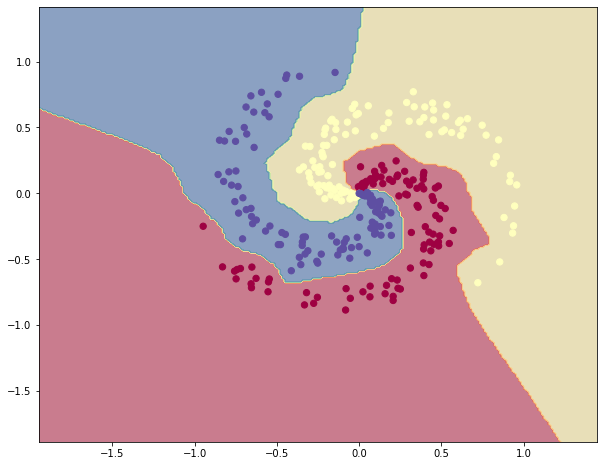

In [15]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


## Problem 1 (c): Experiment with different parameter settings (10 points)

Now experiment with different network configurations and training parameters. For example, you can train models with different numbers of hidden nodes H1 and H2. Train at least three and no more than five networks. For each network, display the decision boundaries on the training data, and include a Markdown cell that describes its behavior relative to the other networks you train. Specifically, comment on how the different settings of the parameters change the bias and variance of the fitted model.

In [21]:
#new model 1
W1, b1, W2, b2, W3, b3 = train_3_layer_network(H1=10, H2=10)

iteration 0: loss 3.154405
iteration 1000: loss 0.149277
iteration 2000: loss 0.066069
iteration 3000: loss 0.047631
iteration 4000: loss 0.039274
iteration 5000: loss 0.034176
iteration 6000: loss 0.030395
iteration 7000: loss 0.027717
iteration 8000: loss 0.025719
iteration 9000: loss 0.024183
iteration 10000: loss 0.022918
iteration 11000: loss 0.021862
iteration 12000: loss 0.020954
iteration 13000: loss 0.020145
iteration 14000: loss 0.019453
iteration 15000: loss 0.018853
iteration 16000: loss 0.018324
iteration 17000: loss 0.017856
iteration 18000: loss 0.017441
iteration 19000: loss 0.017068


In [22]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.6f' % (np.mean(predicted_class == y)))

training accuracy: 0.993333


(-1.8850693285424291, 1.4149306714575494)

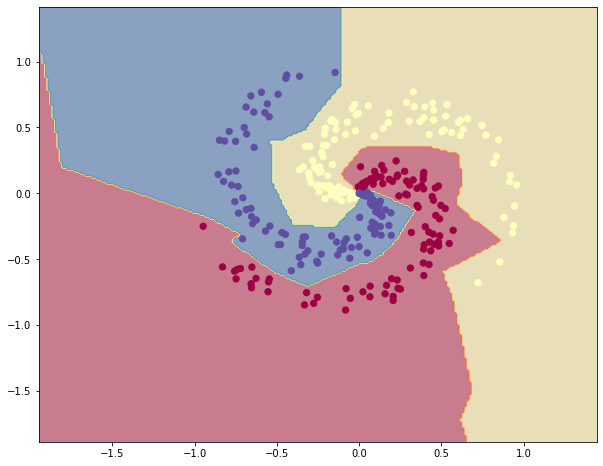

In [23]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [27]:
#new model 2
W1, b1, W2, b2, W3, b3 = train_3_layer_network(H1=3, H2=3)

iteration 0: loss 1.084763
iteration 1000: loss 0.673544
iteration 2000: loss 0.491796
iteration 3000: loss 0.469914
iteration 4000: loss 0.465292
iteration 5000: loss 0.459666
iteration 6000: loss 0.457306
iteration 7000: loss 0.455047
iteration 8000: loss 0.452380
iteration 9000: loss 0.450231
iteration 10000: loss 0.448628
iteration 11000: loss 0.446117
iteration 12000: loss 0.444215
iteration 13000: loss 0.442925
iteration 14000: loss 0.440072
iteration 15000: loss 0.433586
iteration 16000: loss 0.430801
iteration 17000: loss 0.429048
iteration 18000: loss 0.427624
iteration 19000: loss 0.426370


In [28]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.6f' % (np.mean(predicted_class == y)))

training accuracy: 0.850000


(-1.8850693285424291, 1.4149306714575494)

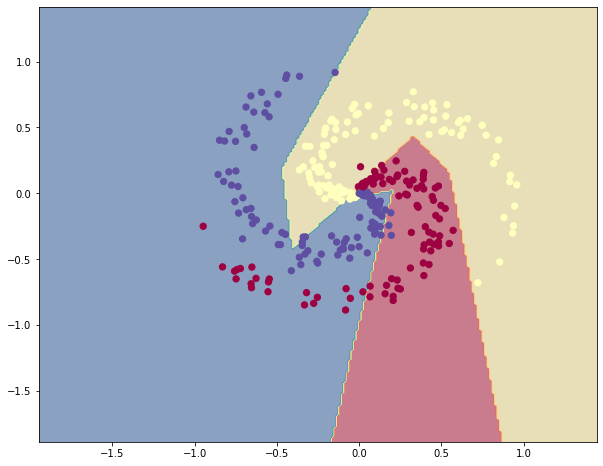

In [29]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [30]:
#new model 3
W1, b1, W2, b2, W3, b3 = train_3_layer_network(H1=3, H2=5)

iteration 0: loss 1.712466
iteration 1000: loss 0.476703
iteration 2000: loss 0.341847
iteration 3000: loss 0.262638
iteration 4000: loss 0.209954
iteration 5000: loss 0.179817
iteration 6000: loss 0.157719
iteration 7000: loss 0.146591
iteration 8000: loss 0.139333
iteration 9000: loss 0.133205
iteration 10000: loss 0.128541
iteration 11000: loss 0.125193
iteration 12000: loss 0.123617
iteration 13000: loss 0.122381
iteration 14000: loss 0.121750
iteration 15000: loss 0.121334
iteration 16000: loss 0.120098
iteration 17000: loss 0.119759
iteration 18000: loss 0.119256
iteration 19000: loss 0.119004


In [31]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.6f' % (np.mean(predicted_class == y)))

training accuracy: 0.953333


(-1.8850693285424291, 1.4149306714575494)

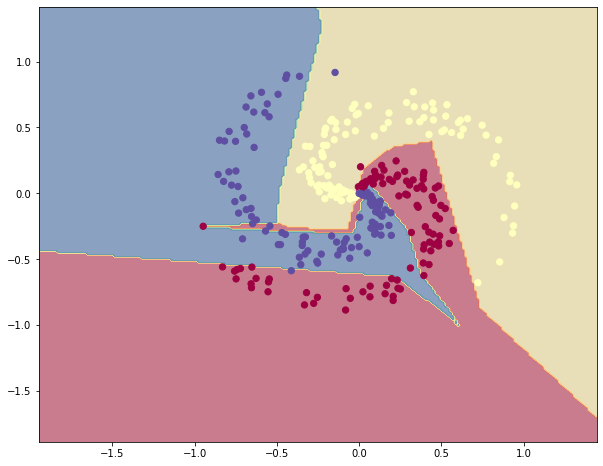

In [32]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [33]:
#new model 4
W1, b1, W2, b2, W3, b3 = train_3_layer_network(H1=5, H2=3)

iteration 0: loss 1.098575
iteration 1000: loss 0.426584
iteration 2000: loss 0.229131
iteration 3000: loss 0.184800
iteration 4000: loss 0.169339
iteration 5000: loss 0.160607
iteration 6000: loss 0.156257
iteration 7000: loss 0.158022
iteration 8000: loss 0.156630
iteration 9000: loss 0.154234
iteration 10000: loss 0.153163
iteration 11000: loss 0.152646
iteration 12000: loss 0.150654
iteration 13000: loss 0.148973
iteration 14000: loss 0.148708
iteration 15000: loss 0.147382
iteration 16000: loss 0.146364
iteration 17000: loss 0.121909
iteration 18000: loss 0.115617
iteration 19000: loss 0.112914


In [34]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.6f' % (np.mean(predicted_class == y)))

training accuracy: 0.976667


(-1.8850693285424291, 1.4149306714575494)

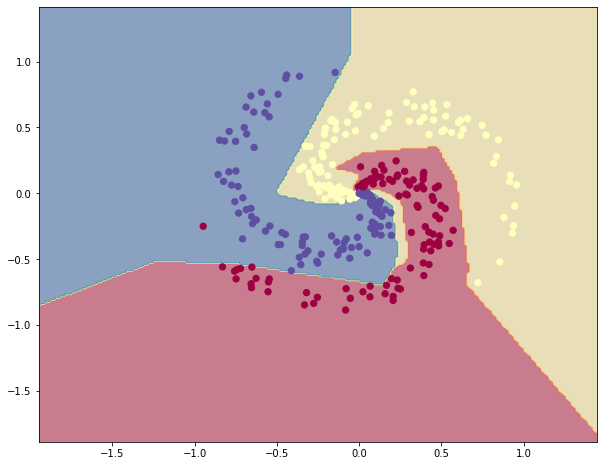

In [35]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In general, the higher the parameters, the better accuracy of the model. In model 3 & 4, we can see that increasing H1 seems to improve the accuracy more than increasing H2. However, after parameters reach a certain number (here I have H1=10, H2=10), the accuracy doesn't improve much as parameters increase.